In [1]:
import numpy as np   # for array stuff
import pylab as pl   # for plotting stuff

In [2]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [3]:
import pandas as pd  # for data formatting

In [4]:
datfile1 = './DATA/Lerwick.dat'
datfile2 = './DATA/Eastbourne.dat'
datfile3 = './DATA/Camborne.dat'
datfile4 = './DATA/Cwmystwyth.dat'

In [5]:
def read_data(datafile):
 
    # open the file as read only
    infile = open(datafile,'r')
 
    # initialise some empty lists for the different parameters:
    year=[];mm=[];tmax=[];tmin=[];af=[];rain=[];sun=[]
 
    # loop through the lines in the file:
    while True:
 
        # read each line
        # if there's no line to read (end of file), exit
        line=infile.readline()
        if not line: break
 
        # remove timestamps with missing data:
        if '---' not in line:
 
            # split each line into pieces:
            items = line.split()
 
            # remove header info:
            if (items[0][0]!='#'):
                year.append(float(items[0]))
 
                # remove qualifiers:
                if (items[1][-1]!='#') and (items[1][-1]!='*'):
                    mm.append(float(items[1]))
                else:
                    mm.append(float(items[1][:-1]))
                if (items[2][-1]!='#') and (items[2][-1]!='*'):
                    tmax.append(float(items[2]))
                else:
                    tmax.append(float(items[2][:-1]))
                if (items[3][-1]!='#') and (items[3][-1]!='*'):
                    tmin.append(float(items[3]))
                else:
                    tmin.append(float(items[3][:-1]))
                if (items[4][-1]!='#') and (items[4][-1]!='*'):
                    af.append(float(items[4]))
                else:
                    af.append(float(items[4][:-1]))
                if (items[5][-1]!='#') and (items[5][-1]!='*'):
                    rain.append(float(items[5]))
                else:
                    rain.append(float(items[5][:-1]))
                if (items[6][-1]!='#') and (items[6][-1]!='*'):
                    sun.append(float(items[6]))
                else:
                    sun.append(float(items[6][:-1]))
 
    # convert the lists into numpy arrays:
    year=np.array(year)
    mm = np.array(mm)
    tmax = np.array(tmax)
    tmin = np.array(tmin)
    af = np.array(af)
    rain = np.array(rain)
    sun = np.array(sun)
 
    # stack all the arrays of data into one big array
    data = np.vstack((year,mm,tmax,tmin,af,rain,sun))
 
    return data

In [6]:
# Lerwick
data1 = read_data(datfile1)
 
# Eastbourne:
data2 = read_data(datfile2)
 
# Camborne:
data3 = read_data(datfile3)
 
# Cwmystwyth:
data4 = read_data(datfile4)

In [7]:
# make an array of zeros:
target1 = np.zeros(data1.shape[1])
 
# make an array of ones:
target2 = np.zeros(data2.shape[1])
target2+=1
 
# make an array of twos:
target3 = np.zeros(data3.shape[1])
target3+=2
 
# make an array of threes:
target4 = np.zeros(data4.shape[1])
target4+=3

In [8]:
# Stack all the data into a single array and make sure it's the right way around...
data = np.hstack((data1,data2,data3,data4))
data = data.transpose()
 
target = np.hstack((target1,target2,target3,target4))

In [9]:
feature_names=np.array(['year','month','tmax','tmin','af','rain','sun'])
target_names=np.array(['lerwick','eastbourne','camborne','cwmystwyth'])

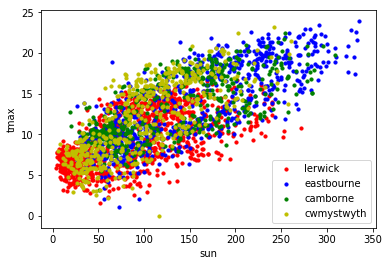

In [29]:
# choose parameter pair:
p1=6;p2=2
 
# plot the data for Lerwick (red):
pl.scatter(data[np.where(target==0),p1], data[np.where(target==0),p2], s=10, label=target_names[0], c='r')
# plot the data for Eastbourne (blue):
pl.scatter(data[np.where(target==1),p1], data[np.where(target==1),p2], s=10, label=target_names[1], c='b')
# plot the data for Camborne (green):
pl.scatter(data[np.where(target==2),p1], data[np.where(target==2),p2], s=10, label=target_names[2], c='g')
# plot the data for Cwmystwyth (yellow):
pl.scatter(data[np.where(target==3),p1], data[np.where(target==3),p2], s=10, label=target_names[3], c='y')
 
# Label the axes:
pl.xlabel(feature_names[p1])
pl.ylabel(feature_names[p2])
 
# Add a legend
pl.legend(loc='best')
 
# display the plot:
pl.show()

In [11]:
df = pd.DataFrame(data, columns=feature_names)

In [12]:
frac = 0.75
df['is_train'] = np.random.uniform(0, 1, len(df)) <= frac

In [13]:
df['places'] = pd.Categorical.from_codes(target, target_names)

In [14]:
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [30]:
features = df.columns[1:7]

In [31]:
forest = RFC(n_jobs=2,n_estimators=100)

In [32]:
y, _ = pd.factorize(train['places'])

In [33]:
forest.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
preds = target_names[forest.predict(test[features])]

In [35]:
print pd.crosstab(index=test['places'], columns=preds, rownames=['actual'], colnames=['preds'])

preds       camborne  cwmystwyth  eastbourne  lerwick
actual                                               
lerwick            3           8           3      262
eastbourne        42           3         133       12
camborne          64           3          38        3
cwmystwyth         0          97           4       21


In [36]:
importances = forest.feature_importances_
indices = np.argsort(importances)

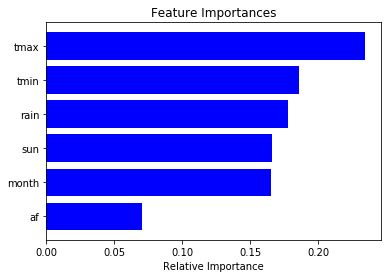

In [37]:
pl.figure(1)
pl.title('Feature Importances')
pl.barh(range(len(indices)), importances[indices], color='b', align='center')
pl.yticks(range(len(indices)), features[indices])
pl.xlabel('Relative Importance')
 
pl.show()